# Data Science in Telco: Data Cleansing

<p><b>About :</b> -</p>

<p><b>Course :</b> <a href=https://academy.dqlab.id/main/package/practice/247?pf=0>Data Science in Telco: Data Cleansing</a></p>

<h2>Module Content:</h2>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li><a href="#pendahuluan">Pendahuluan</a></li>
        <li><a href="#import-library-dan-load-dataset">Import Library dan Load Dataset</a></li>
        <ul>
            <li><a href="#library">Library</a></li>
            <li><a href="#dataset">Dataset</a></li>
        </ul>
        <li><a href="#validitas-id-pelanggan">Mencari Validitas ID Number Pelanggan</a></li>
        <ul>
            <li><a href="#"></a></li>
            <li><a href="#"></a></li>
        </ul>
        <li><a href="#"></a></li>
        <ul>
            <li><a href="#"></a></li>
            <li><a href="#"></a></li>
        </ul>
        <li><a href="#"></a></li>
        <ul>
            <li><a href="#"></a></li>
            <li><a href="#"></a></li>
        </ul>
        <li><a href="#"></a></li>
        <ul>
            <li><a href="#"></a></li>
            <li><a href="#"></a></li>
        </ul>
    </ul>
</div>

<h2><a name="pendahuluan"></a>Chapter 1: Pendahuluan</h2>

Siapkan data sekaligus membuat model prediksi yang tepat untuk menentukan pelanggan akan berhenti berlangganan (churn) atau tidak dengan melakukan Data Prepocessing (Data Cleansing) untuk bulan Juni 2020.

Langkah yang akan dilakukan adalah:
<ol>
    <li>Mencari ID pelanggan (Nomor telphone) yang valid</li>
    <li>Mengatasi data-data yang masih kosong (Missing Values)</li>
    <li>Mengatasi Nilai-Nilai Pencilan (Outlier) dari setiap Variable</li>
    <li>Menstandarisasi Nilai dari Variable</li>
</ol>

<h2><a name="import-library-dan-load-dataset"></a>Chapter 2: Import Library dan Load Dataset</h2>

<h3><a name="library"></a>Library</h3>

Library yang akan digunakan untuk membantu melakukan proses analisa data:

<ol>
    <li><b>Pandas</b>, (Python for Data Analysis) library Python yang fokus untuk proses analisis data seperti manipulasi data, persiapan data, dan pembersihan data.</li>
    <li><b>Matplotlib</b>, library Python yang fokus pada visualisasi data seperti membuat plot grafik. Matplotlib dapat digunakan dalam skrip Python, Python dan IPython shell, server aplikasi web, dan beberapa toolkit graphical user interface (GUI) lainnya.</li>
    <li><b>Seaborn</b>, memperkenalkan tipe plot tambahan dan membuat plot Matplotlib tradisional terlihat sedikit lebih cantik.</li>
</ol>

<h3><a name="dataset"></a>Dataset</h3>

Source : https://storage.googleapis.com/dqlab-dataset/dqlab_telco.csv

Detail informasi dataset:
    <li><code>UpdatedAt</code> Periode of Data taken</li>
    <li><code>customerID</code> Customer ID</li>
    <li><code>gender</code> Whether the customer is a male or a female (Male, Female)</li>
    <li><code>SeniorCitizen</code> Whether the customer is a senior citizen or not (1, 0)</li>
    <li><code>Partner</code> Whether the customer has a partner or not (Yes, No)</li>
    <li><code>Dependents</code> Whether the customer has dependents or not (Yes, No)</li>
    <li><code>tenure</code> Number of months the customer has stayed with the company</li>
    <li><code>PhoneService</code> Whether the customer has a phone service or not (Yes, No)</li>
    <li><code>MultipleLines</code> Whether the customer has multiple lines or not (Yes, No, No phone service)</li>
    <li><code>InternetService</code> Customer’s internet service provider (DSL, Fiber optic, No)</li>
    <li><code>OnlineSecurity</code> Whether the customer has online security or not (Yes, No, No internet service)</li>
    <li><code>OnlineBackup</code> Whether the customer has online backup or not (Yes, No, No internet service)</li>
    <li><code>DeviceProtection</code> Whether the customer has device protection or not (Yes, No, No internet service)</li>
    <li><code>TechSupport</code> Whether the customer has tech support or not (Yes, No, No internet service)</li>
    <li><code>StreamingTV</code> Whether the customer has streaming TV or not (Yes, No, No internet service)</li>
    <li><code>StreamingMovies</code> Whether the customer has streaming movies or not (Yes, No, No internet service)</li>
    <li><code>Contract</code> The contract term of the customer (Month-to-month, One year, Two year)</li>
    <li><code>PaperlessBilling</code> Whether the customer has paperless billing or not (Yes, No)</li>
    <li><code>PaymentMethod</code> The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))</li>
    <li><code>MonthlyCharges</code> The amount charged to the customer monthly</li>
    <li><code>TotalCharges</code> The total amount charged to the customer</li>
    <li><code>Churn</code> Whether the customer churned or not (Yes or No)</li>

In [36]:
#import library
import pandas as pd
pd.options.display.max_columns = 50 # mempermudah penampilan row data

#import dataset
df_load = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/dqlab_telco.csv')

#Tampilkan jumlah baris dan kolom
print(df_load.shape)

#Jumlah ID yang unik
print(df_load.customerID.nunique())

#Tampilkan 5 data teratas
df_load.head()

(7113, 22)
7017


,UpdatedAt,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,202006,45759018157,Female,0,Yes,No,1.0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,202006,45557574145,Male,0,No,No,34.0,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,202006,45366876421,Male,0,No,No,2.0,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,202006,45779536532,Male,0,No,No,45.0,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,202006,45923787906,Female,0,No,No,2.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


<h2><a name="validitas-id-pelanggan"></a>Chapter 3: Mencari Validitas ID Number Pelanggan</h2>

<h4>Memfilter ID Number Pelanggan dengan Format Tertentu</h4>

Mencari format ID Number (Phone Number) Pelanggan customerID yang benar, dengan kriteria:

<ul>
    <li>Panjang karakter adalah 11-12.</li>
    <li>Terdiri dari Angka Saja, tidak diperbolehkan ada karakter selain angka</li>
    <li>Diawali dengan angka 45 2 digit pertama.</li>
</ul>

Gunakan fungsi <code>count()</code> untuk menghitung banyaknya rows Customer ID, atau juga bisa menggunakan <code>str.match()</code> & <code>regex</code> untuk mencocokan dengan kriteria diatas. Jangan lupa gunakan <code>astype()</code> untuk merubah tipe datanya yang semula numeric.

In [37]:
df_load['valid_id'] = df_load['customerID'].astype(str).str.match(r'(45\d{9,10})')
df_load = (df_load[df_load['valid_id'] == True]).drop('valid_id', axis = 1)
print('Hasil jumlah ID Customer yang terfilter adalah',df_load['customerID'].count())

Hasil jumlah ID Customer yang terfilter adalah 7006


<h4>Memfilter Duplikasi ID Number Pelanggan</h4>

Memastikan bahwa tidak ada Id Number pelanggan yang duplikat. Biasanya duplikasi ID number ini tipenya:

<ul>
    <li>Duplikasi dikarenakan inserting melebihi satu kali dengan nilai yang sama tiap kolomnya</li>
    <li>Duplikasi dikarenakan inserting beda periode pengambilan data</li>
</ul>

Gunakan hasil dari pengolahan di tahap sebelumnya df_load untuk di olah di tahap ini. Gunakan fungsi <code>drop_duplicates()</code> untuk menghapus duplikasi rows, dan gunakan <code>sort_valus()</code> untuk mengecek pengambilan data terakhir

In [41]:
# drop duplicate rows
df_load.drop_duplicates()

# drop duplicate sorted by 'UpdatedAt'
df_load = df_load.sort_values('UpdatedAt', ascending=False).drop_duplicates(['customerID'])
print('Hasil jumlah ID Customer yang sudah dihilangkan duplikasinya (distinct) adalah', df_load['customerID'].count())

Hasil jumlah ID Customer yang sudah dihilangkan duplikasinya (distinct) adalah 6993


<b>Kesimpulan:</b> Validitas dari ID Number pelanggan sangat diperlukan untuk memastikan bahwa data yang kita ambil sudah benar. Berdasarkan hasil tersbut, terdapat perbedaan jumlah nomor ID dari data pertama kali di load sampai dengan hasil akhir. Jumlah row data ketika pertama kali di load ada sebanyak <b>7113</b> rows dan 22 coloumns dengan 7017 jumlah ID yang Unique. Kemudian setelah di cek validitas dari ID pelanggan, maka tersisa <b>6993</b> rows data.

<h2><a name="feature-engineering"></a>Chapter 4: Feature Engineering</h2>

Feature Engineering adalah tentang membuat fitur baru dari fitur yang sudah ada.

Dari sini kita akan membuat beberapa fitur baru yang bertujuan menaikkan akurasi dari model machine learning kita.

Fitur pertama yang kita buat adalah <b>Family_Size</b>, sesuai namanya ini adalah gabungan dari <b>Parent</b>, <b>Children</b>, <b>Sibling</b>, dan <b>Spouse</b>. Lalu kita tambahkan 1 dengan asumsi menghitung diri orang itu juga.

In [17]:
df_all['Family_Size'] = df_all['SibSp'] + df_all['Parch'] + 1
df_all['Family_Size'].unique()

array([ 2,  1,  5,  3,  7,  6,  4,  8, 11], dtype=int64)

Fitur kedua yang kita buat adalah menggabungkan <b>Family_Size</b> dengan groupnya masing-masing tergantung jumlahnya.

Kategorinya adalah seperti berikut.
<ul>
    <li>Family Size 1 = <b>Alone</b></li>
    <li>Family Size 2, 3 dan 4 = <b>Small</b></li>
    <li>Family Size 5 dan 6 = <b>Medium</b></li>
    <li>Family Size 7, 8 dan 11 = <b>Large</b></li>
</ul>

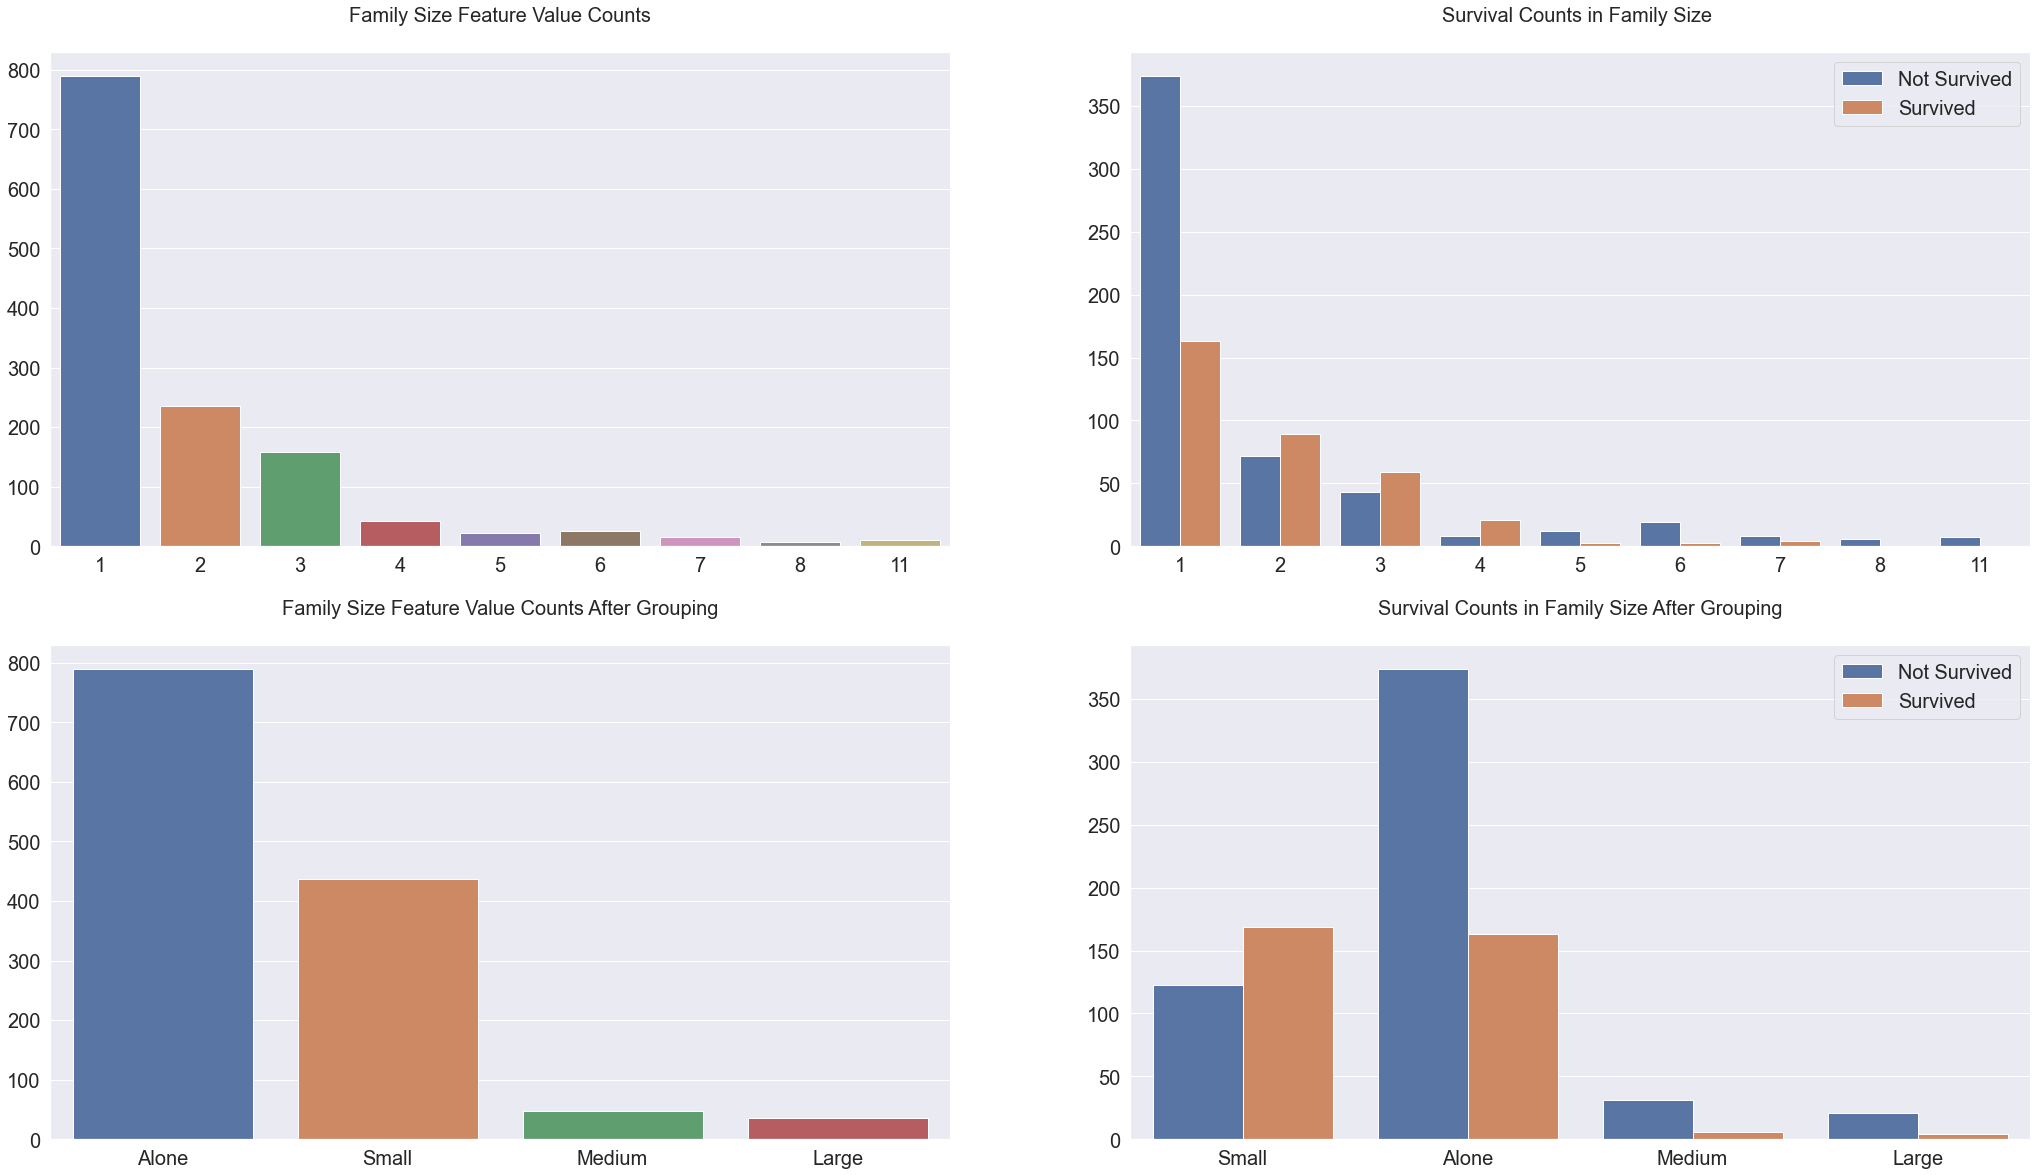

In [18]:
fig, axs = plt.subplots(figsize=(20, 20), ncols=2, nrows=2)
plt.subplots_adjust(right=1.5)

sns.barplot(x=df_all['Family_Size'].value_counts().index, y=df_all['Family_Size'].value_counts().values, ax=axs[0][0])
sns.countplot(x='Family_Size', hue='Survived', data=df_all, ax=axs[0][1])

axs[0][0].set_title('Family Size Feature Value Counts', size=20, y=1.05)
axs[0][1].set_title('Survival Counts in Family Size ', size=20, y=1.05)

family_map = {1: 'Alone', 2: 'Small', 3: 'Small', 4: 'Small', 5: 'Medium', 6: 'Medium', 7: 'Large', 8: 'Large', 11: 'Large'}
df_all['Family_Size_Grouped'] = df_all['Family_Size'].map(family_map)

sns.barplot(x=df_all['Family_Size_Grouped'].value_counts().index, y=df_all['Family_Size_Grouped'].value_counts().values, ax=axs[1][0])
sns.countplot(x='Family_Size_Grouped', hue='Survived', data=df_all, ax=axs[1][1])

axs[1][0].set_title('Family Size Feature Value Counts After Grouping', size=20, y=1.05)
axs[1][1].set_title('Survival Counts in Family Size After Grouping', size=20, y=1.05)

for i in range(2):
    axs[i][1].legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 20})
    for j in range(2):
        axs[i][j].tick_params(axis='x', labelsize=20)
        axs[i][j].tick_params(axis='y', labelsize=20)
        axs[i][j].set_xlabel('')
        axs[i][j].set_ylabel('')

plt.show()

Anda perhatikan code pada livecode dan jalankan. Pada plot menjelaskan bahwa orang dengan <b>Family_Size 2,3,4</b> mempunyai kemungkinan selamat lebih besar, selebihnya kemungkinannya menurun dan orang yang pergi dengan <b>Family_Size_Grouped Small</b> lebih terlihat mempunyai tingkat keselamatan lebih besar.

Kita buat feature baru bernama <b>Ticket_Frequency</b> dengan nilai gabungan dari Ticket yang sama. Contoh sebelumnya akan bernilai 6, karena ada 6 ticket yang sama dalam data kita.

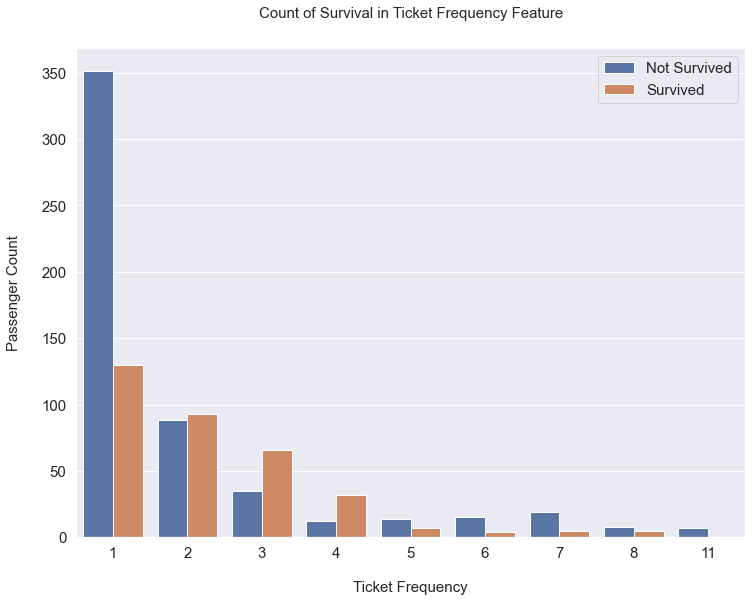

In [27]:
df_all['Ticket_Frequency'] = df_all.groupby('Ticket')['Ticket'].transform('count')

fig, axs = plt.subplots(figsize=(12, 9))
sns.countplot(x='Ticket_Frequency', hue='Survived', data=df_all)

plt.xlabel('Ticket Frequency', size=15, labelpad=20)
plt.ylabel('Passenger Count', size=15, labelpad=20)
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)

plt.legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 15})
plt.title('Count of Survival in {} Feature'.format('Ticket Frequency'), size=15, y=1.05)

plt.show()

Pada hasil plot penjelasannya feature <b>Family_Size</b>, di angka 2,3,4 kemungkinan tingkat selamatnya meningkat.

Kenapa feature ini berbeda dari <b>Family_Size</b>? Karena bisa jadi ada pembantu, teman yang menggunakan tiket yang sama tetapi tidak terhitung sebagai keluarga.

In [30]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Jika anda lihat pada data di atas, dari nama orang yang ada di dataset ini, semuanya mempunyai pola yang sama, yaitu: <code>[Nama_belakang], [Jabatan]. [Nama_depan]</code>. Sehingga kita bisa mengambil jabatannya saja dengan mengambil kata setelah "," (koma) dan sebelum "." (titik). Fungsi <code>.split()</code> akan membagi kalimat menjadi beberapa kata dengan keyword tertentu, dan dapat diambil dengan index [ ]

Dari sini kita bisa membuat fitur baru dengan nama <b>‘Title’</b> yang berisi jabatan seseorang.

In [43]:
df_all['Title'] = df_all['Name'].str.split(', ', expand=True)[1].str.split('.', expand=True)[0]
print(df_all['Title'].unique())

['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'the Countess' 'Jonkheer' 'Dona']


Jabatan yang paling umum di sini adalah Mr, Mrs, dan Miss sehingga kita bisa mengetahui status menikah seseorang dari Mrs. Kita bisa membuat fitur baru lagi yaitu <b>‘Is_Married’</b> Fitur ini adalah jika seseorang mempunyai jabatan ‘Mrs’ , berarti dia sudah menikah.

In [44]:
df_all['Is_Married'] = 0
df_all['Is_Married'].loc[df_all['Title'] == 'Mrs'] = 1

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


Setelah menjalankan perintah <code>df_all['Title'].unique()</code>, ternyata ada banyak sekali jabatan lain, dan kita mengelompokkannya menjadi satu pada konten berikutnya:
<ul>
    <li>['Miss', 'Mrs','Ms', 'Mlle', 'Lady', 'Mme', 'the Countess', 'Dona'] akan kita ubah menjadi 'Miss/Mrs/Ms'</li>
    <li>['Dr', 'Col', 'Major', 'Jonkheer', 'Capt', 'Sir', 'Don', 'Rev'] menjadi 'Dr/Military/Noble/Clergy'</li>
</ul>

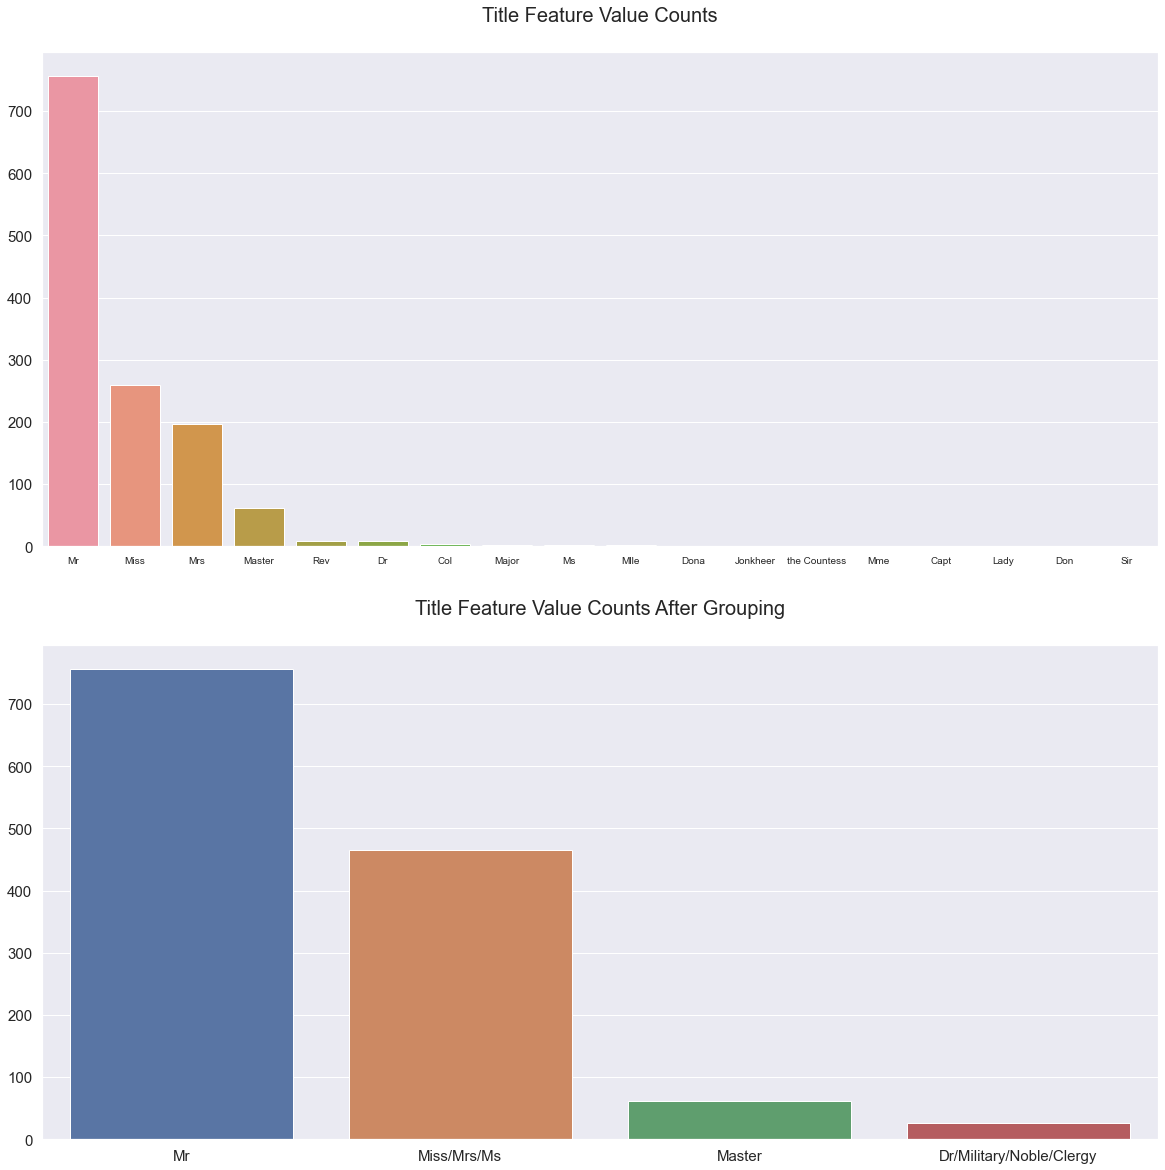

In [46]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=2, figsize=(20,20))
sns.barplot(x=df_all['Title'].value_counts().index, y=df_all['Title'].value_counts().values, ax=axs[0])

axs[0].tick_params(axis='x', labelsize=10)
axs[1].tick_params(axis='x', labelsize=15)

for i in range(2):
    axs[i].tick_params(axis='y', labelsize=15)

axs[0].set_title('Title Feature Value Counts', size=20, y=1.05)

df_all['Title'] = df_all['Title'].replace(['Miss', 'Mrs','Ms', 'Mlle', 'Lady', 'Mme', 'the Countess', 'Dona'], 'Miss/Mrs/Ms')
df_all['Title'] = df_all['Title'].replace(['Dr', 'Col', 'Major', 'Jonkheer', 'Capt', 'Sir', 'Don', 'Rev'], 'Dr/Military/Noble/Clergy')

sns.barplot(x=df_all['Title'].value_counts().index, y=df_all['Title'].value_counts().values, ax=axs[1])
axs[1].set_title('Title Feature Value Counts After Grouping', size=20, y=1.05)

plt.show()

In [47]:
df_all.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Family_Size,Family_Size_Grouped,Ticket_Frequency,Title,Is_Married
0,"(21.0, 22.0]",NaN,S,"(-0.001, 7.25]","Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,2,Small,1,Mr,0
1,"(34.0, 40.0]",C85,C,"(56.496, 83.475]","Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,2,Small,2,Miss/Mrs/Ms,1
2,"(25.0, 26.0]",NaN,S,"(7.896, 8.05]","Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,1,Alone,1,Miss/Mrs/Ms,0
3,"(34.0, 40.0]",C123,S,"(34.075, 56.496]","Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,2,Small,2,Miss/Mrs/Ms,1
4,"(34.0, 40.0]",NaN,S,"(7.896, 8.05]","Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,1,Alone,1,Mr,0


<h2><a name="modeling"></a>Chapter 5: Modeling</h2>

<h3><a name="modeling-dengan-feature-engineering"></a>Modeling dengan Feature Engineering</h3>

Sebelum mulai membuat model, kita bagi kembali dataset kita menjadi train dan test.

In [48]:
df_train = df_all.loc[:890]
df_test = df_all.loc[891:]
dfs = [df_train, df_test]

Selanjutnya adalah transformasi data dengan <code>LabelEncoder</code> untuk data” yang bersifat <b>non-numeric</b>, tujuannya adalah melakukan encoding [0-n] untuk data kategorikal. Contohnya Sex, akan diubah menjadi 0 dan 1, laki-laki dan perempuan.

In [49]:
non_numeric_features = ['Embarked', 'Sex', 'Title', 'Family_Size_Grouped', 'Age', 'Fare']

for df in dfs:
    for feature in non_numeric_features:        
        df[feature] = LabelEncoder().fit_transform(df[feature])

<ipython-input-49-4dfe27b37d15>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[feature] = LabelEncoder().fit_transform(df[feature])


Transformasi berikutnya adalah ubah feature <b>kategori</b> menjadi one hot, dengan <code>OneHotEncoder</code>. Akan menghasilkan beberapa kolom tergantung banyaknya kategori.

Contohnya Pclass akan menjadi 3 kolom Pclass_1, Pclass_2, dan Pclass_3. Isinya adalah 0 dan 1 tergantung kategori orang tersebut

In [50]:
cat_features = ['Pclass', 'Sex', 'Embarked', 'Title', 'Family_Size_Grouped']
encoded_features = []

for df in dfs:
    for feature in cat_features:
        encoded_feat = OneHotEncoder().fit_transform(df[feature].values.reshape(-1, 1)).toarray()
        n = df[feature].nunique()
        cols = ['{}_{}'.format(feature, n) for n in range(1, n + 1)]
        encoded_df = pd.DataFrame(encoded_feat, columns=cols)
        encoded_df.index = df.index
        encoded_features.append(encoded_df)

df_train = pd.concat([df_train, *encoded_features[:5]], axis=1)
df_test = pd.concat([df_test, *encoded_features[5:]], axis=1)

Drop kolom-kolom yang tidak kita perlukan, atau yang sudah kita encode sebelumnya

In [51]:
df_all = concat_df(df_train, df_test)
drop_cols = ['Cabin', 'Embarked', 'Family_Size', 'Family_Size_Grouped', 'Survived', 
             'Name', 'PassengerId', 'Pclass', 'Sex', 'Ticket', 'Title']

df_all.drop(columns=drop_cols, inplace=True)
df_all.head()

,Age,Embarked_1,Embarked_2,Embarked_3,Family_Size_Grouped_1,Family_Size_Grouped_2,Family_Size_Grouped_3,Family_Size_Grouped_4,Fare,Is_Married,...,Pclass_2,Pclass_3,Sex_1,Sex_2,SibSp,Ticket_Frequency,Title_1,Title_2,Title_3,Title_4
0,2,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0,0,...,0.0,1.0,0.0,1.0,1,1,0.0,0.0,0.0,1.0
1,7,1.0,0.0,0.0,0.0,0.0,0.0,1.0,11,1,...,0.0,0.0,1.0,0.0,1,2,0.0,0.0,1.0,0.0
2,4,0.0,0.0,1.0,1.0,0.0,0.0,0.0,3,0,...,0.0,1.0,1.0,0.0,0,1,0.0,0.0,1.0,0.0
3,7,0.0,0.0,1.0,0.0,0.0,0.0,1.0,10,1,...,0.0,0.0,1.0,0.0,1,2,0.0,0.0,1.0,0.0
4,7,0.0,0.0,1.0,1.0,0.0,0.0,0.0,3,0,...,0.0,1.0,0.0,1.0,0,1,0.0,0.0,0.0,1.0


In [55]:
df_all.columns

Index(['Age', 'Embarked_1', 'Embarked_2', 'Embarked_3',
       'Family_Size_Grouped_1', 'Family_Size_Grouped_2',
       'Family_Size_Grouped_3', 'Family_Size_Grouped_4', 'Fare', 'Is_Married',
       'Parch', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_1', 'Sex_2', 'SibSp',
       'Ticket_Frequency', 'Title_1', 'Title_2', 'Title_3', 'Title_4'],
      dtype='object')

Bagi kembali data menjadi train dan test, juga tentukan nilai X dan y untuk digunakan pada proses modeling.

In [56]:
X_train = StandardScaler().fit_transform(df_train.drop(columns=drop_cols))
y_train = df_train['Survived'].values
X_test = StandardScaler().fit_transform(df_test.drop(columns=drop_cols))

print('X_train shape: {}'.format(X_train.shape))
print('y_train shape: {}'.format(y_train.shape))
print('X_test shape: {}'.format(X_test.shape))

X_train shape: (891, 22)
y_train shape: (891,)
X_test shape: (418, 22)


Selanjutnya proses modeling, kita akan menggunakan <code>RandomForestClassifier</code> dari SkLearn dan menghitung akurasi menggunakan <code>cross_val_score</code>.

In [59]:
random_forest = RandomForestClassifier(criterion='gini', 
                                       n_estimators=1100,
                                       max_depth=5,
                                       min_samples_split=4,
                                       min_samples_leaf=5,
                                       max_features='auto',
                                       oob_score=True,
                                       random_state=50)
random_forest.fit(X_train, y_train)

scores = cross_val_score(random_forest, X_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.83333333 0.87640449 0.76404494 0.87640449 0.84269663 0.80898876
 0.82022472 0.78651685 0.87640449 0.85393258]
Mean: 0.8338951310861423
Standard Deviation: 0.03719055862675359


Hasil <b>akurasi</b> dengan menggunakan feature dari <b>feature engineering</b> adalah sekitar <b>0.833</b>.

<h3><a name="modeling-tanpa-feature-engineering"></a>Modeling Tanpa Feature Engineering</h3>

In [60]:
df_all = concat_df(df_train, df_test)
drop_cols = ['Cabin', 'Embarked', 'Family_Size', 'Family_Size_Grouped', 'Survived',
             'Name', 'PassengerId', 'Pclass', 'Sex', 'Ticket', 'Title',
             'Family_Size_Grouped_1', 'Family_Size_Grouped_2', 'Family_Size_Grouped_3', 'Family_Size_Grouped_4',
             'Ticket_Frequency', 'Title_1', 'Title_2', 'Title_3', 'Title_4', 'Is_Married']

df_all.drop(columns=drop_cols, inplace=True)

df_all.head()

,Age,Embarked_1,Embarked_2,Embarked_3,Fare,Parch,Pclass_1,Pclass_2,Pclass_3,Sex_1,Sex_2,SibSp
0,2,0.0,0.0,1.0,0,0,0.0,0.0,1.0,0.0,1.0,1
1,7,1.0,0.0,0.0,11,0,1.0,0.0,0.0,1.0,0.0,1
2,4,0.0,0.0,1.0,3,0,0.0,0.0,1.0,1.0,0.0,0
3,7,0.0,0.0,1.0,10,0,1.0,0.0,0.0,1.0,0.0,1
4,7,0.0,0.0,1.0,3,0,0.0,0.0,1.0,0.0,1.0,0


In [61]:
X_train = StandardScaler().fit_transform(df_train.drop(columns=drop_cols))
y_train = df_train['Survived'].values
X_test = StandardScaler().fit_transform(df_test.drop(columns=drop_cols))

print('X_train shape: {}'.format(X_train.shape))
print('y_train shape: {}'.format(y_train.shape))
print('X_test shape: {}'.format(X_test.shape))

X_train shape: (891, 12)
y_train shape: (891,)
X_test shape: (418, 12)


In [62]:
random_forest = RandomForestClassifier(criterion='gini', 
                                       n_estimators=1100,
                                       max_depth=5,
                                       min_samples_split=4,
                                       min_samples_leaf=5,
                                       max_features='auto',
                                       oob_score=True,
                                       random_state=50)
random_forest.fit(X_train, y_train)

scores = cross_val_score(random_forest, X_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.8        0.79775281 0.75280899 0.86516854 0.85393258 0.79775281
 0.79775281 0.76404494 0.86516854 0.79775281]
Mean: 0.8092134831460674
Standard Deviation: 0.037541543709642765


Akurasi yang dihasilkan dengan feature engineering lebih tinggi sekitar 0.2 , artinya fitur yang kita buat dapat menaikkan 2% akurasi model. Ini adalah salah satu kegunaan dari Feature Engineering.

<b style="color:red">Note:</b> Akurasi ini tidak absolut dan dapat berubah, tergantung dari banyak factor, termasuk dari parameter yang dimasukkan. Fitur yang kita buat pun dapat menjadi buruk juga tergantung tipe model yang digunakan.

<h3><a name="kesimpulan"></a>Kesimpulan</h3>

Hasil perbandingan dari 2 model tersebut seperti di bawah ini:

<img src="Resources/perbandingan_model.png" width=70%>

<b>Konklusi:</b>
<ul>
    <li>Feature Engineering mengharuskan kita membuat banyak ide fitur dari data yang sudah ada.</li>
    <li>Biasanya yang dapat kita lakukan adalah, penggabungan (grouping), ekstraksi fitur (seperti Title yang didapat dari nama orang), dan masih banyak lagi.</li>
    <li>Jangan malas untuk melakukan feature engineering dan mencoba segala sesuatu yang ada di pikiran kita. Barangkali ini dapat meningkatkan akurasi model kita.</li>
</ul>